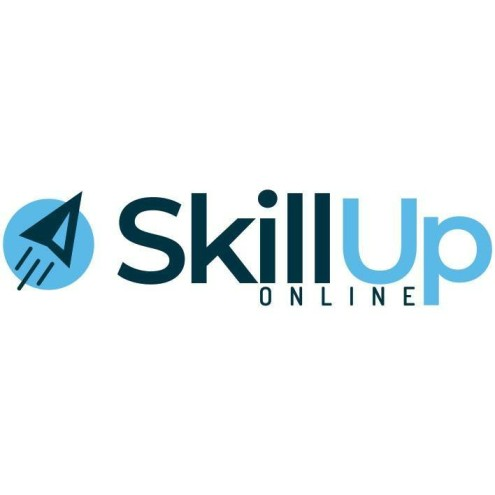


Dataset Link: https://www.kaggle.com/datasets/chakradharmattapalli/covid-19-cases

### Importing Necessary Libraries

In [1]:
'''Importing Necessary Librariesssss'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import seaborn as sns

### Import and read dataset

In [2]:
'''Import and read dataset'''
covid_data=pd.read_csv("Covid_19_cases4.csv")
covid_data.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories
0,31-05-2021,31,5,2021,366,5,Austria
1,30-05-2021,30,5,2021,570,6,Austria
2,29-05-2021,29,5,2021,538,11,Austria
3,28-05-2021,28,5,2021,639,4,Austria
4,27-05-2021,27,5,2021,405,19,Austria
5,26-05-2021,26,5,2021,287,8,Austria
6,25-05-2021,25,5,2021,342,3,Austria
7,24-05-2021,24,5,2021,520,3,Austria
8,23-05-2021,23,5,2021,626,8,Austria
9,22-05-2021,22,5,2021,671,12,Austria



<details><summary><b>Click Here for the Hint</b></summary>

 

```
Start by importing the pandas library: import pandas as pd
    
Use the read_csv() function to load the CSV file into a pandas DataFrame. Specify the file path in the parentheses, for example: pd.read_csv("file_path.csv")
    
Assign the resulting DataFrame to a variable name, for example: data = pd.read_csv("file_path.csv")
    
Use the head() method on the DataFrame to display the first 10 rows, for example: data.head(10)
    
Make sure to replace "file_path.csv" with the actual file path and name of your CSV file.

```

 

</details>

### Data Cleaning

a. Missing Value

In [3]:
'''Data Cleaning missing values'''
covid_data.isnull().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
dtype: int64

<details><summary><b>Click Here for the Hint</b></summary>

 

```

    Use the DataFrame variable name followed by the isnull() method to create a Boolean DataFrame where True indicates a null value and False indicates a non-null value.

    Use the sum() method on the Boolean DataFrame to count the number of True values (i.e., the number of null values) in each column.

    Putting these together, the code would look like this: data.isnull().sum()


    This code assumes that the pandas DataFrame is named data. If your DataFrame has a different name, replace data with the appropriate variable name.

```

 

</details>

b. Duplicate data

In [4]:
'''Duplicate Data'''
covid_data.duplicated().sum()

0

<details><summary><b>Click Here for the Hint</b></summary>

 

```
Use the DataFrame variable name followed by the duplicated() method to create a Boolean DataFrame where True indicates a duplicate row and False indicates a non-duplicate row.

Use the sum() method on the Boolean DataFrame to count the number of True values (i.e., the number of duplicate rows).

Putting these together, the code would look like this: data.duplicated().sum()

This code assumes that the pandas DataFrame is named data. If your DataFrame has a different name, replace data with the appropriate variable name.

```

 

</details>

c. drop unecessary columns

In [5]:
'''Drop unnecessary columns'''
covid_data=covid_data.drop(['day', 'month', 'year'], axis=1)
'''Convert dateRep to datetime object and set it as index'''
covid_data['dateRep']=pd.to_datetime(covid_data['dateRep'])
covid_data=covid_data.set_index(['dateRep'])

### Data Analysis

1. Count the total number of cases and deaths in the dataset.

In [6]:
'''count total cases and deaths'''
total_cases=covid_data['cases'].sum()
total_deaths=covid_data['deaths'].sum()
print("Total cases:",total_cases)
print("Total deaths:",total_deaths)

Total cases: 9994560
Total deaths: 178247


<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
Use the sum() function to calculate the total number of COVID-19 cases and deaths. To do this, select the columns containing the cases and deaths data using the DataFrame column names and apply the sum() function to each column.

Store the results of the sum() function in two separate variables, one for total cases and one for total deaths.

Print the results using the print() function, along with a descriptive message indicating whether each number represents total cases or total deaths.
    
```

 

</details>

2. Calculate the percentage of cases and deaths by country.

In [7]:
'''group data by country and calculate the total cases and deaths for each country'''
grouped_data=covid_data.groupby('countriesAndTerritories')[['cases', 'deaths']].sum()
'''calculate the percentage of total cases and deaths for each country'''
grouped_data['case_percentage']=(grouped_data['cases']/total_cases)*100
grouped_data['death_percentage']=(grouped_data['deaths']/total_deaths)*100
'''select the columns containing the case and death percentages and print them'''
percentage_data=grouped_data[['case_percentage', 'death_percentage']]
print(percentage_data)


                         case_percentage  death_percentage
countriesAndTerritories                                   
Austria                         1.845164          1.079962
Belgium                         2.882758          1.512508
Bulgaria                        1.713292          4.191375
Croatia                         1.132296          1.395816
Cyprus                          0.377205          0.072371
Czechia                         4.214503          5.407665
Denmark                         0.692257          0.086958
Estonia                         0.629502          0.366907
Finland                         0.347789          0.099300
France                         20.219079         12.890540
Germany                        12.347297         10.287410
Greece                          2.103154          3.113657
Hungary                         3.718153          8.232958
Iceland                         0.005273          0.000561
Ireland                         0.420799          0.3489

<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
Use the groupby() function to group the data by country. Pass the column name containing the countries as an argument to the groupby() function.

Use the sum() function to calculate the total number of COVID-19 cases and deaths for each country. To do this, select the columns containing the cases and deaths data using the DataFrame column names and apply the sum() function to each column.

Create two new columns in the DataFrame to store the percentage of total cases and deaths for each country. To do this, divide the total number of cases and deaths for each country by the total number of cases and deaths across all countries, respectively. Multiply the result by 100 to convert to a percentage.

Select the columns containing the case and death percentages and print them using the print() function. To do this, use double square brackets to select the columns as a DataFrame.
    
```

 

</details>

3. Find the country with the highest number of cases and deaths.

In [8]:
'''Country has the highest number of cases and deaths'''
highest_cases_country=grouped_data['cases'].idxmax()
highest_deaths_country=grouped_data['deaths'].idxmax()
'''highest cases and deaths'''
highest_cases=grouped_data['cases'].max()
highest_deaths=grouped_data['deaths'].max()
'''printing the values'''
print("Country has the highest number of cases:",highest_cases_country,"-->",highest_cases)
print("Country has the highest number of deaths:",highest_deaths_country,"-->",highest_deaths)

Country has the highest number of cases: France --> 2020808
Country has the highest number of deaths: Poland --> 29969


<details><summary><b>Click Here for the Hint</b></summary>

 

``` 
Use the groupby() function to group the data by country. Pass the column name containing the countries as an argument to the groupby() function.

Use the sum() function to calculate the total number of COVID-19 cases and deaths for each country. To do this, select the columns containing the cases and deaths data using the DataFrame column names and apply the sum() function to each column.

Use the idxmax() function to identify the country with the highest number of COVID-19 cases and deaths. To do this, select the cases and deaths columns from the country_totals DataFrame and apply the idxmax() function to each column. The idxmax() function returns the index (i.e., the country name) of the row with the highest value.

Store the results of the idxmax() function in separate variables, one for the country with the highest number of cases and one for the country with the highest number of deaths.

Use the max() function to calculate the highest number of COVID-19 cases and deaths. To do this, select the cases and deaths columns from the country_totals DataFrame and apply the max() function to each column.

Store the results of the max() function in separate variables, one for the highest number of cases and one for the highest number of deaths.

Print the results using the print() function, along with descriptive messages indicating which country has the highest number of cases and which country has the highest number of deaths. Use string interpolation to include the variables storing the country names and the variables storing the numbers of cases and deaths.
    

```

 

</details>